<a href="https://colab.research.google.com/github/pranalid2639-sketch/first-repository/blob/main/Cognifyz_LEVEL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEVEL 2

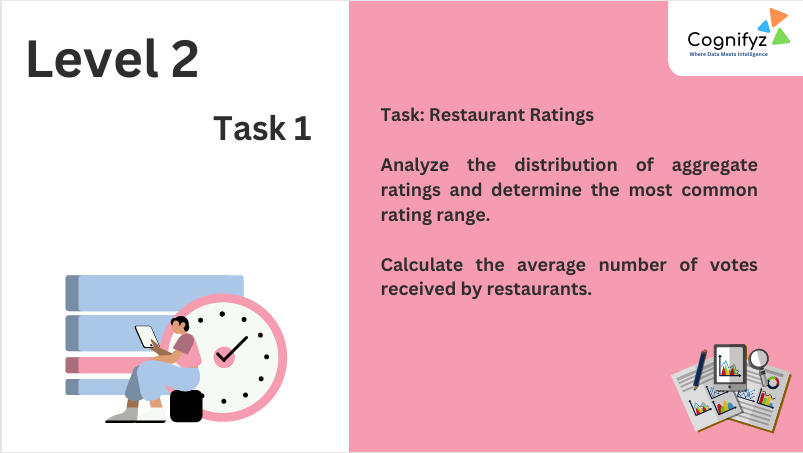

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dataset _cognifyz.csv")
df.head()




Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

Distribution of Aggregate Ratings

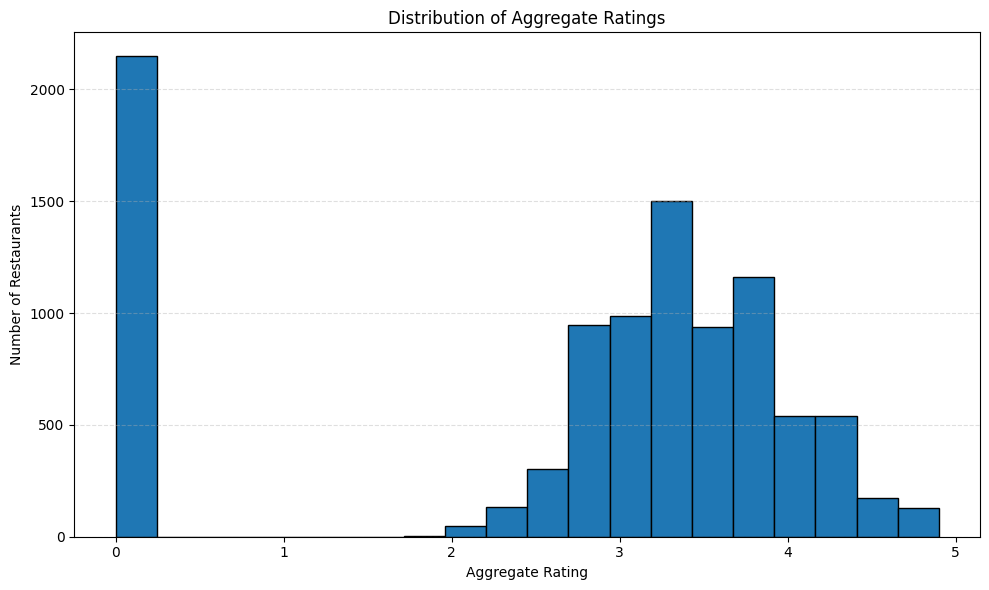

In [37]:
plt.figure(figsize=(10,6))
plt.hist(
    df['Aggregate rating'],
    bins=20,
    edgecolor='black'
)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Most Common Rating Range

In [38]:
rating_bins = pd.cut(
    df['Aggregate rating'],
    bins=[0,1,2,3,4,5],
    labels=["0-1", "1-2", "2-3", "3-4", "4-5"]
)

rating_range_counts = rating_bins.value_counts().sort_index()
rating_range_counts




Aggregate rating
0-1       0
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64

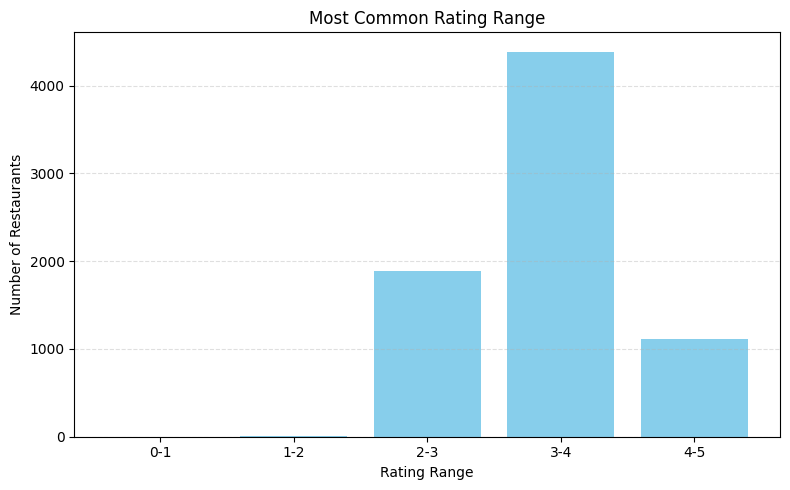

In [39]:
plt.figure(figsize=(8,5))
plt.bar(
    rating_range_counts.index,
    rating_range_counts.values,
    color='skyblue'
)
plt.title("Most Common Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



Average Number of Votes

In [40]:
average_votes = df['Votes'].mean()
average_votes


np.float64(156.909747670401)

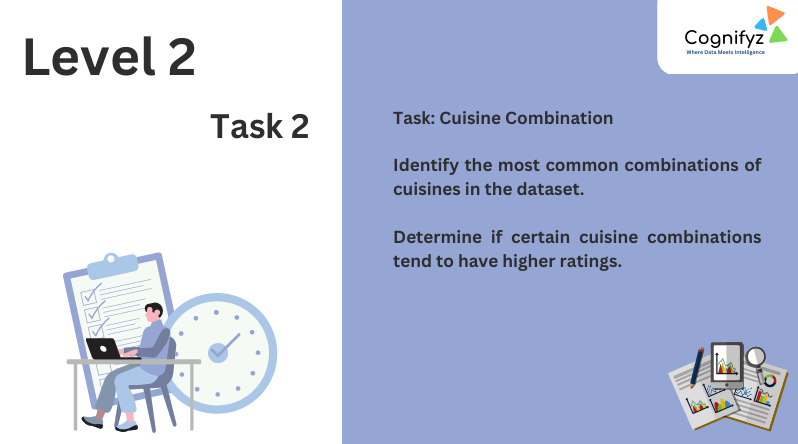

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

df = pd.read_csv("/content/Dataset _cognifyz.csv")
df.head()



Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [43]:
df['Cuisine_list'] = df['Cuisines'].apply(
    lambda x: [c.strip() for c in x.split(',')] if isinstance(x, str) else []
)
df['Cuisine_list'].head()


0          [French, Japanese, Desserts]
1                            [Japanese]
2    [Seafood, Asian, Filipino, Indian]
3                     [Japanese, Sushi]
4                    [Japanese, Korean]
Name: Cuisine_list, dtype: object

Create All Cuisine Combinations

In [44]:
all_pairs = []

for cuisines in df['Cuisine_list']:
    if len(cuisines) > 1:
        all_pairs.extend(combinations(sorted(cuisines), 2))


Count Top 10 Most Common Combinations

In [46]:
pair_counts = Counter(all_pairs)
top_10_pairs = pair_counts.most_common(10)

pair_df = pd.DataFrame(top_10_pairs, columns=['Cuisine Pair', 'Count'])
pair_df



Cuisine Pair  Count
0       (Chinese, North Indian)   1784
1       (Mughlai, North Indian)    832
2     (Fast Food, North Indian)    485
3   (Continental, North Indian)    468
4          (Chinese, Fast Food)    466
5  (North Indian, South Indian)    405
6            (Chinese, Mughlai)    379
7       (Chinese, South Indian)    346
8        (Chinese, Continental)    303
9       (Italian, North Indian)    295

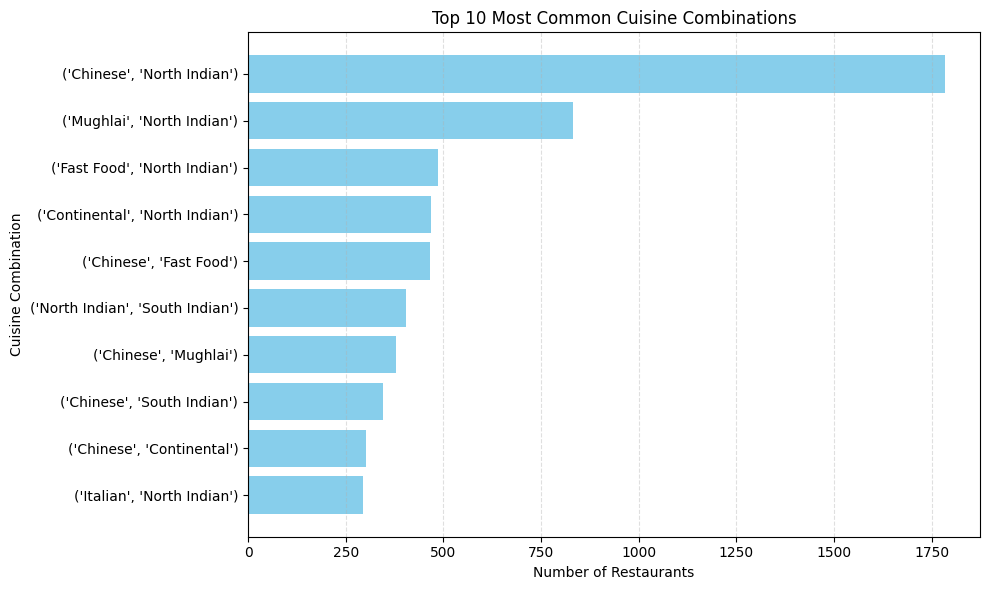

In [47]:
plt.figure(figsize=(10,6))
plt.barh(
    pair_df['Cuisine Pair'].astype(str),
    pair_df['Count'],
    color='skyblue'
)
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Check Ratings for Each Combination

In [48]:
rating_results = []

for pair, count in top_10_pairs:
    c1, c2 = pair

    mask = df['Cuisine_list'].apply(lambda x: c1 in x and c2 in x)
    avg_rating = df.loc[mask, 'Aggregate rating'].mean()

    rating_results.append([f"{c1} + {c2}", avg_rating])

ratings_df = pd.DataFrame(rating_results, columns=['Cuisine Combination', 'Average Rating'])
ratings_df


Cuisine Combination  Average Rating
0       Chinese + North Indian        2.695791
1       Mughlai + North Indian        2.765704
2     Fast Food + North Indian        2.704124
3   Continental + North Indian        3.414530
4          Chinese + Fast Food        2.575536
5  North Indian + South Indian        2.552840
6            Chinese + Mughlai        2.696042
7       Chinese + South Indian        2.476163
8        Chinese + Continental        3.361056
9       Italian + North Indian        3.532203

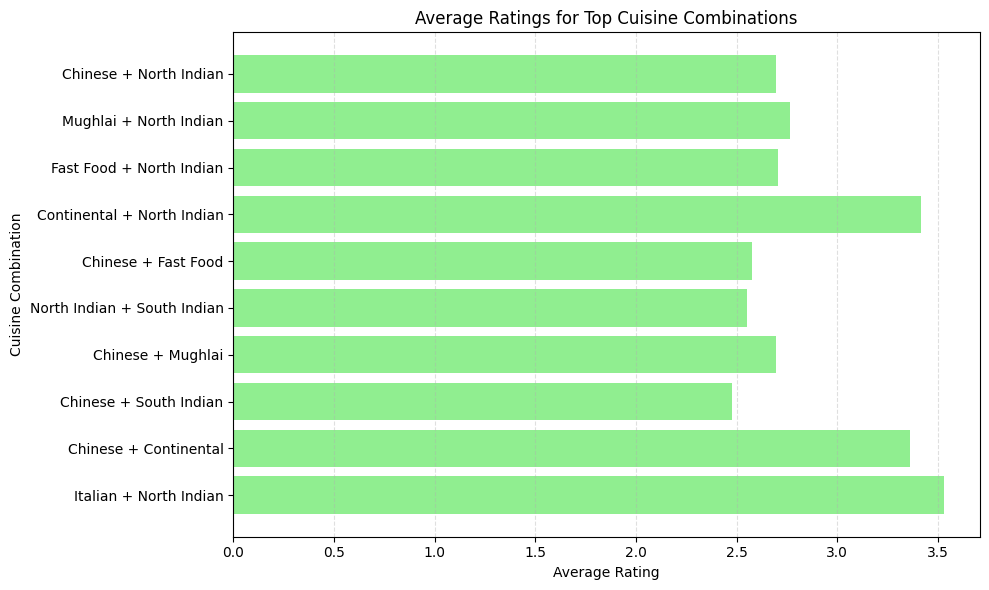

In [49]:
plt.figure(figsize=(10,6))
plt.barh(
    ratings_df['Cuisine Combination'],
    ratings_df['Average Rating'],
    color='lightgreen'
)
plt.title("Average Ratings for Top Cuisine Combinations")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


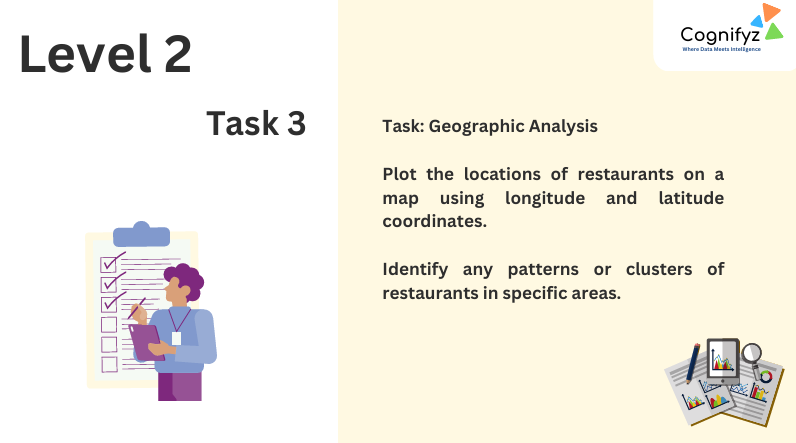

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset _cognifyz.csv")
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

Scatter Plot of Restaurant Locations

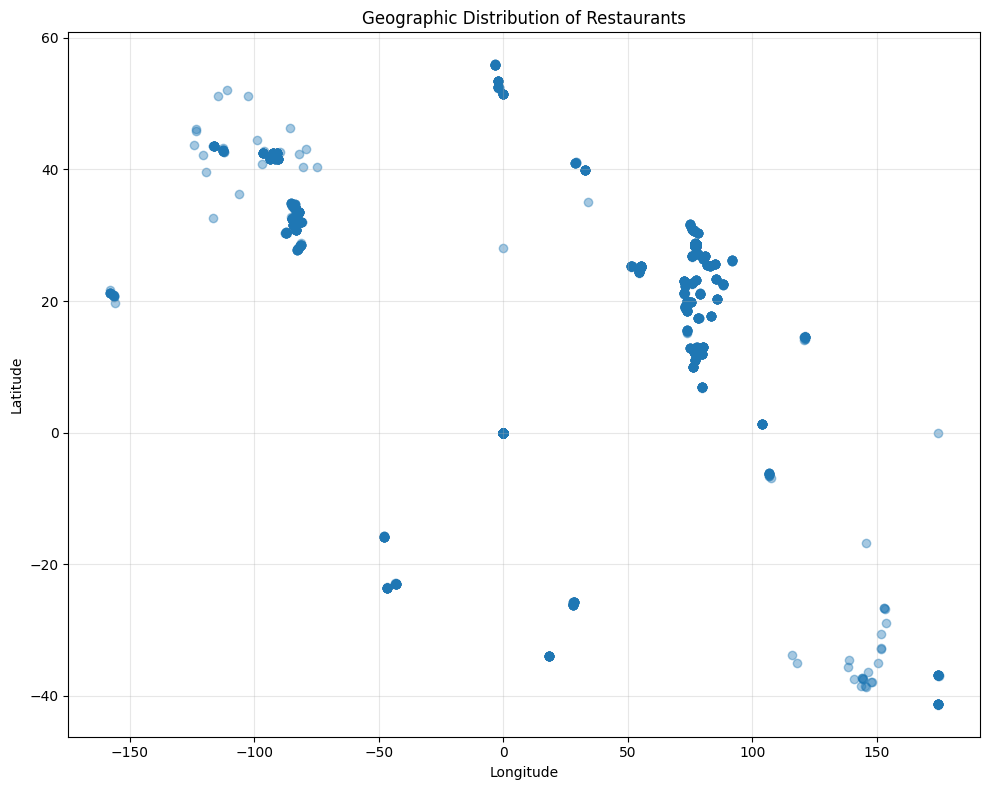

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(
    df['Longitude'],
    df['Latitude'],
    alpha=0.4
)
plt.title("Geographic Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


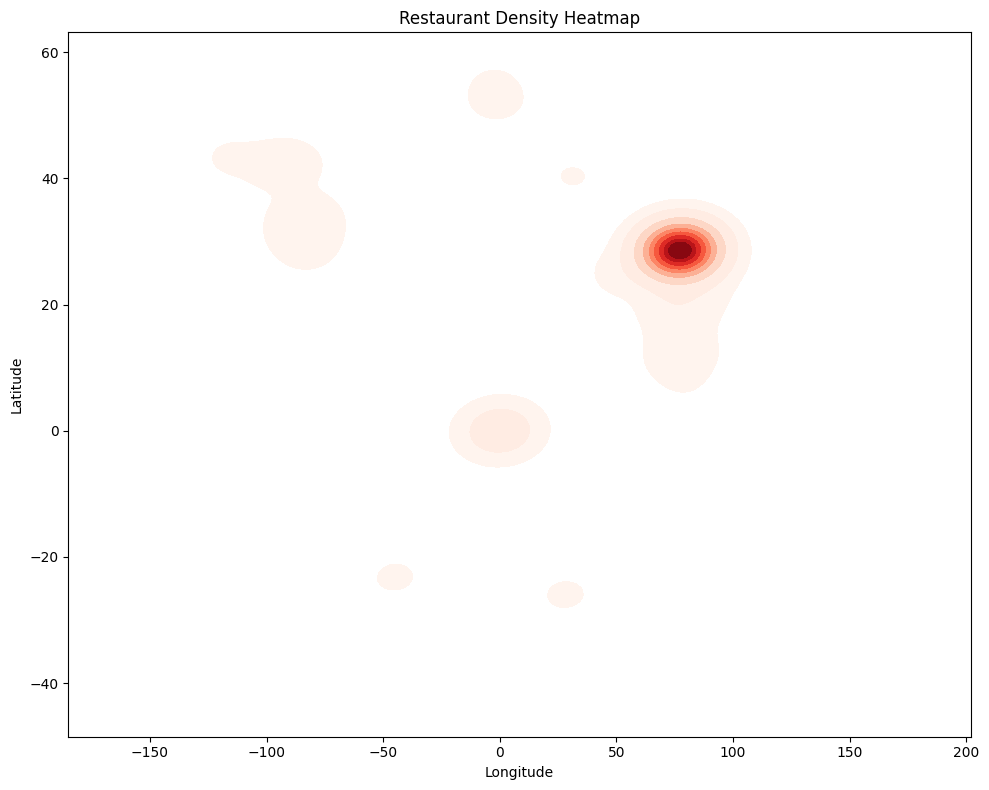

In [52]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=df['Longitude'],
    y=df['Latitude'],
    fill=True,
    cmap="Reds",
    thresh=0.05
)
plt.title("Restaurant Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [53]:
!pip install folium


In [54]:
import folium

# choose a central point
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color="red",
        fill=True
    ).add_to(m)

m


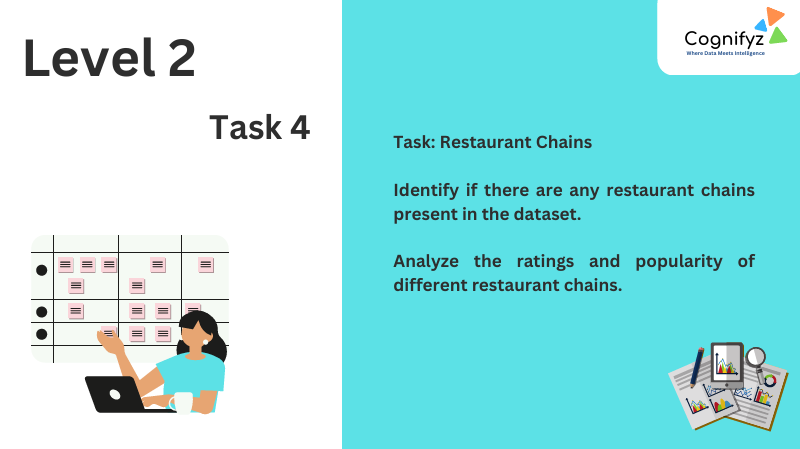

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dataset _cognifyz.csv")
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

Identify Restaurant Chains

In [56]:
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

restaurant_chains


Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Fish Streat          2
Adarsh Kulfi         2
Senorita's           2
Mahi Rasoi           2
Din Tai Fung         2
Name: count, Length: 734, dtype: int64

In [57]:
chain_df = restaurant_chains.reset_index()
chain_df.columns = ['Restaurant Name', 'Outlets']
chain_df


Restaurant Name  Outlets
0     Cafe Coffee Day       83
1      Domino's Pizza       79
2              Subway       63
3    Green Chick Chop       51
4          McDonald's       48
..                ...      ...
729       Fish Streat        2
730      Adarsh Kulfi        2
731        Senorita's        2
732        Mahi Rasoi        2
733      Din Tai Fung        2

[734 rows x 2 columns]

Top Restaurant Chains by Number of Outlets

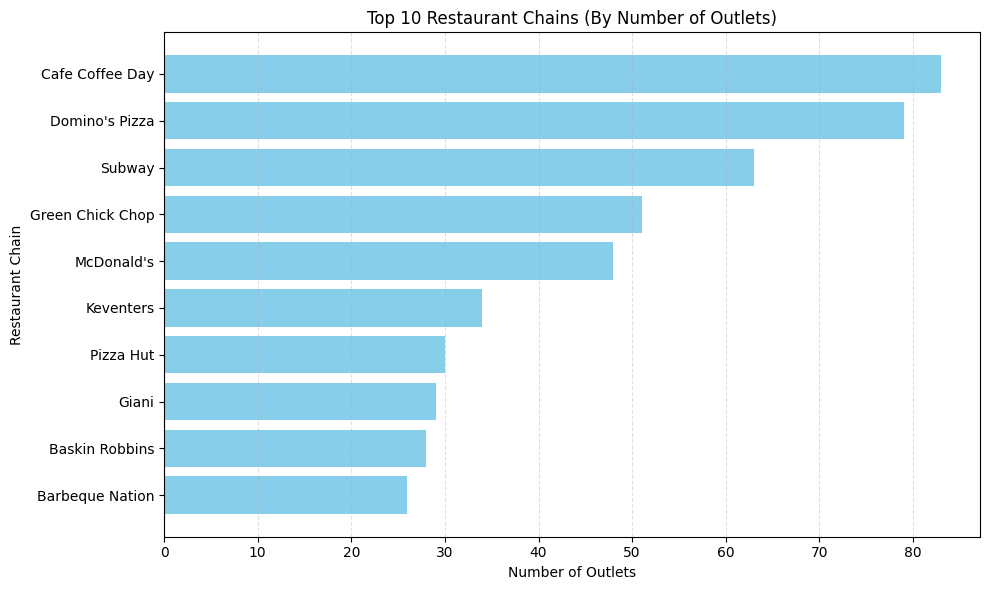

In [58]:
plt.figure(figsize=(10,6))
plt.barh(
    chain_df.head(10)['Restaurant Name'],
    chain_df.head(10)['Outlets'],
    color='skyblue'
)
plt.title("Top 10 Restaurant Chains (By Number of Outlets)")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Chain")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Analyze Ratings of Restaurant Chains

In [59]:
chain_ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean()
chain_ratings = chain_ratings.loc[restaurant_chains.index]

chain_ratings_df = chain_ratings.reset_index()
chain_ratings_df.columns = ['Restaurant Name', 'Average Rating']
chain_ratings_df.head()


Restaurant Name  Average Rating
0   Cafe Coffee Day        2.419277
1    Domino's Pizza        2.740506
2            Subway        2.907937
3  Green Chick Chop        2.672549
4        McDonald's        3.339583

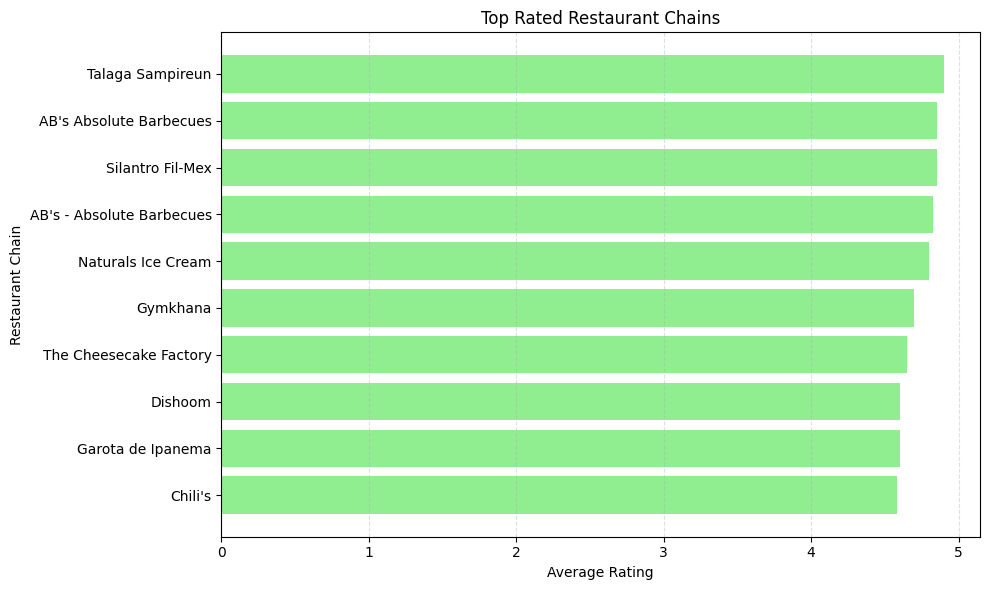

In [60]:
top_rated_chains = chain_ratings_df.sort_values(by='Average Rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(
    top_rated_chains['Restaurant Name'],
    top_rated_chains['Average Rating'],
    color='lightgreen'
)
plt.title("Top Rated Restaurant Chains")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Analyze Popularity Using Votes

In [61]:
chain_votes = df.groupby("Restaurant Name")["Votes"].mean()
chain_votes = chain_votes.loc[restaurant_chains.index]

chain_votes_df = chain_votes.reset_index()
chain_votes_df.columns = ['Restaurant Name', 'Average Votes']
chain_votes_df.head()


Restaurant Name  Average Votes
0   Cafe Coffee Day      29.253012
1    Domino's Pizza      84.088608
2            Subway      97.206349
3  Green Chick Chop      18.901961
4        McDonald's     110.229167

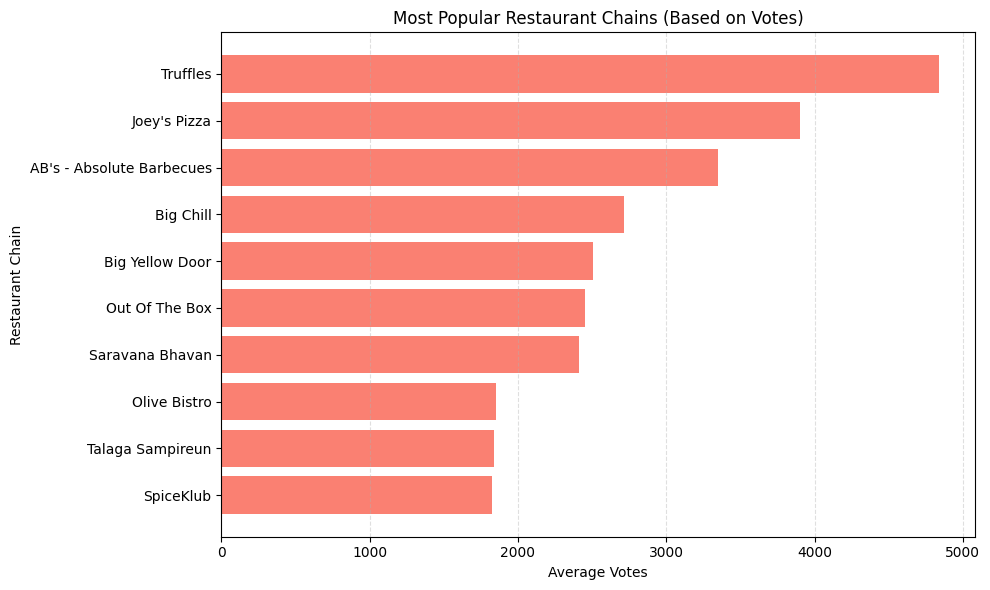

In [62]:
top_voted_chains = chain_votes_df.sort_values(by='Average Votes', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(
    top_voted_chains['Restaurant Name'],
    top_voted_chains['Average Votes'],
    color='salmon'
)
plt.title("Most Popular Restaurant Chains (Based on Votes)")
plt.xlabel("Average Votes")
plt.ylabel("Restaurant Chain")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
